# Thư viện

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Đọc file

In [317]:
test_images = open("C:\\Users\\huyhi\\Downloads\\digitdata\\testimages").read()
training_images = open("C:\\Users\\huyhi\\Downloads\\digitdata\\trainingimages").read()
test_label = open("C:\\Users\\huyhi\\Downloads\\digitdata\\testlabels").read().splitlines()
training_label = open("C:\\Users\\huyhi\\Downloads\\digitdata\\traininglabels").read().splitlines()

In [318]:
# Kiểm tra số ảnh trong test images
test_images_count = images_test.splitlines()
len(test_images_count)/28

1000.0

In [319]:
# Kiểm tra số test label
len(test_label)

1000

In [320]:
# Kiểm tra số ảnh trong training images
training_images_count = training_images.splitlines()
len(training_images_count)/28

5000.0

In [321]:
# Kiểm tra số ảnh trong training label
len(training_label)

5000

(array([434., 479., 535., 563., 495., 488., 493., 501., 550., 462.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

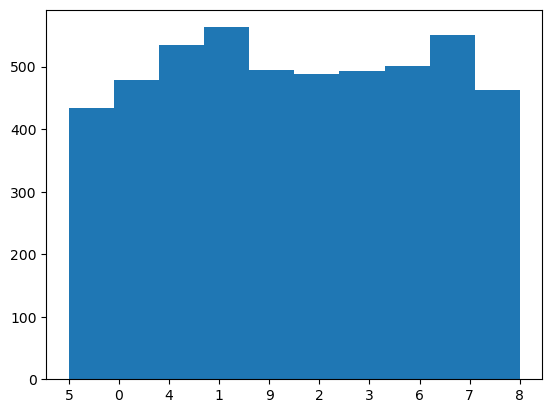

In [322]:
# Phân bố các nhãn trong training label
plt.hist(training_label)

(array([100.,  90., 103.,  92., 108., 106., 103., 107.,  91., 100.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

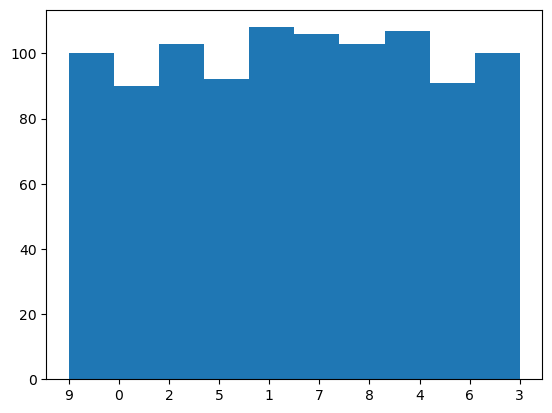

In [323]:
plt.hist(test_label)

# Khởi tạo mô hình

# Sử dụng hai đặc trưng


Ở mô hình đầu ta coi các điểm '#' và các điểm '+' là một đặc trưng và đặc trưng còn lại là các ô  ' '

In [324]:
# Chuẩn bị dữ liệu
def PreProcess(images):
    images = images.replace(' ', '0').replace('#', '1').replace('+', '1').splitlines()
    for i in range(len(images)):
        images[i] = list(images[i])
    images = np.array(images)
    images = images.astype(int)
    return images.reshape(-1,784)

training = PreProcess(training_images)
test = PreProcess(test_images)

In [325]:
test_label = np.array(test_label).astype(int)
training_label = np.array(training_label).astype(int)

Thuật toán Naive Bayes

Vì các xác suất rất nhỏ nên khi sử dụng công thức:
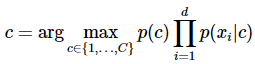
thì có thể xảy ra sai số.
Thay vào đó chúng ta sẽ sử dụng công thức sau:
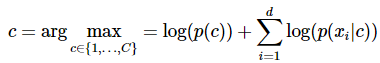

In [326]:
class NaiveBayes:
    def __init__(self, alpha=1):
        self.alpha = alpha 

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)
    
        self._priors = np.zeros(n_classes)
        self._likelihoods = np.zeros((n_classes, n))
        
        for index, c in enumerate(self._classes):
            X_train_c = X_train[c == y_train]
            self._priors[index] =  X_train_c.shape[0] / m 
            self._likelihoods[index, :] = ((X_train_c.sum(axis=0)) + self.alpha) / (np.sum(X_train_c.sum(axis=0) + 2*self.alpha))
        return self._priors, self._likelihoods

    def predict(self, X_test, priors, likelihoods):
        return [self.maximum_posteriori(x_test, priors, likelihoods) for x_test in X_test]

    def maximum_posteriori(self, x_test, priors, likelihoods):
        posteriors = []
        for index in range(len(self._classes)):
            prior = np.log(priors[index])
            likelihood = np.log(likelihoods[index,:]) * x_test
            posterior = np.sum(likelihood) + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

In [429]:
def Result(actual,predicted):
    N = np.unique(actual).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(actual.shape[0]):
        cm[actual[n], predicted[n]] += 1
    
    accuracy = np.diagonal(cm).sum()/cm.sum()

    cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)
    cm = cm.round(2)
    
    return cm, accuracy

In [411]:
def display_result(actual, display, normalize):
    print(' '*18 + ' Confusion Matrix '+ ' '*20)
    print(normalize)
    print('\nImage number\t Actual label \t Predicted label')
    print('============\t=============\t=================')
    for index in range(1,len(actual)+1):
        print(index, '\t\t',actual[index-1], '\t\t', predicted[index-1])

In [380]:
# Sử dụng Laplace Smoothing, thử với các giá trị alpha khác nhau để chạy thuật toán 
alpha = np.arange(0.2, 2.1, 0.2)
for i in alpha:
    model = NaiveBayes(i)
    priors, likelihoods = model.fit(training, label_training)   
    predicted = model.predict(test, priors, likelihoods)
    nor, acc = Result(label_test, predicted)
    print("alpha: ", i)
    print("Accuracy: {}% ".format(acc*100))

alpha:  0.2
Accuracy: 75.5% 
alpha:  0.4
Accuracy: 75.4% 
alpha:  0.6000000000000001
Accuracy: 75.5% 
alpha:  0.8
Accuracy: 75.5% 
alpha:  1.0
Accuracy: 75.4% 
alpha:  1.2
Accuracy: 75.6% 
alpha:  1.4000000000000001
Accuracy: 75.6% 
alpha:  1.6
Accuracy: 75.5% 
alpha:  1.8
Accuracy: 75.3% 
alpha:  2.0
Accuracy: 75.3% 


# Lưu mô hình
Lưu mô hình với alpha = 1 vào file 

In [381]:
model = NaiveBayes(alpha = 1)
priors, likelihoods = model.fit(training, training_label)

In [382]:
df = pd.DataFrame(likelihoods)
df.to_excel('likelihoods.xlsx', sheet_name='new_sheet_name',index=False)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
1,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021
2,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
3,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
4,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014
5,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
6,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014
7,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000115,0.000058,0.000029,0.000043,0.000043,0.000014,0.000014,0.000014,0.000014,0.000014
8,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
9,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000030,0.000045,0.000030,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


In [383]:
df = pd.DataFrame(priors)
df.to_excel('priors.xlsx', sheet_name='new_sheet_name',index=False)
df

,0
0,0.0958
1,0.1126
2,0.0976
3,0.0986
4,0.1070
5,0.0868
6,0.1002
7,0.1100
8,0.0924
9,0.0990


# Đọc mô hình từ file

In [422]:
likelihoodsModel = np.array(pd.read_excel('likelihoods.xlsx'))
priorsModel = np.array(pd.read_excel('priors.xlsx'))

In [423]:
print(likelihoodsModel.shape)
print(priorsModel.shape)

(10, 784)
(10, 1)


In [430]:
predicted = model.predict(test, priorsModel, likelihoodsModel) 
normal, acc = Result(label_test, predicted)
print("alpha: ", 1)
print("Accuracy: {}% ".format(acc*100))

alpha:  1
Accuracy: 75.4% 


In [431]:
display_result(label_test, predicted, normal)

                   Confusion Matrix                     
[[0.87 0.   0.01 0.   0.   0.01 0.03 0.   0.08 0.  ]
 [0.   0.94 0.   0.   0.   0.   0.01 0.   0.05 0.  ]
 [0.01 0.02 0.75 0.03 0.02 0.01 0.06 0.01 0.1  0.  ]
 [0.   0.   0.   0.84 0.   0.01 0.02 0.04 0.02 0.07]
 [0.   0.   0.02 0.   0.67 0.01 0.04 0.   0.03 0.23]
 [0.02 0.01 0.01 0.18 0.05 0.5  0.02 0.01 0.1  0.09]
 [0.02 0.05 0.02 0.   0.03 0.03 0.79 0.   0.04 0.  ]
 [0.   0.05 0.03 0.   0.04 0.   0.   0.71 0.04 0.14]
 [0.01 0.02 0.03 0.12 0.03 0.05 0.   0.01 0.64 0.1 ]
 [0.01 0.   0.   0.03 0.08 0.   0.   0.02 0.04 0.82]]

Image number	 Actual label 	 Predicted label
============	=============	=================
1 		 9 		 7
2 		 0 		 0
3 		 2 		 2
4 		 5 		 3
5 		 1 		 1
6 		 9 		 9
7 		 7 		 7
8 		 8 		 8
9 		 1 		 1
10 		 0 		 0
11 		 4 		 4
12 		 1 		 1
13 		 7 		 9
14 		 9 		 9
15 		 6 		 4
16 		 4 		 9
17 		 2 		 2
18 		 6 		 2
19 		 8 		 8
20 		 1 		 1
21 		 3 		 3
22 		 7 		 7
23 		 5 		 9
24 		 4 		 4
25 		 4 		 8
26 		

# Trộn dữ liệu và chạy lại thuật toán

In [432]:
data =list(zip(training,training_label))

In [433]:
random.shuffle(data)
training_suffle,training_label_suffle = zip(*data)
training_suffle = np.array(training_suffle)
training_label_suffle = np.array(training_label_suffle)

In [434]:
model = NaiveBayes(alpha = 1)
priors, likelihoods = model.fit(training_suffle, training_label_suffle)

In [435]:
predicted = model.predict(test, priors, likelihoods) 
normal, acc = Result(test_label, predicted)
print("alpha: ", 1)
print("Accuracy: {}% ".format(acc*100))

alpha:  1
Accuracy: 75.4% 


In [436]:
display_result(label_test, predicted, normal)

                   Confusion Matrix                     
[[0.87 0.   0.01 0.   0.   0.01 0.03 0.   0.08 0.  ]
 [0.   0.94 0.   0.   0.   0.   0.01 0.   0.05 0.  ]
 [0.01 0.02 0.75 0.03 0.02 0.01 0.06 0.01 0.1  0.  ]
 [0.   0.   0.   0.84 0.   0.01 0.02 0.04 0.02 0.07]
 [0.   0.   0.02 0.   0.67 0.01 0.04 0.   0.03 0.23]
 [0.02 0.01 0.01 0.18 0.05 0.5  0.02 0.01 0.1  0.09]
 [0.02 0.05 0.02 0.   0.03 0.03 0.79 0.   0.04 0.  ]
 [0.   0.05 0.03 0.   0.04 0.   0.   0.71 0.04 0.14]
 [0.01 0.02 0.03 0.12 0.03 0.05 0.   0.01 0.64 0.1 ]
 [0.01 0.   0.   0.03 0.08 0.   0.   0.02 0.04 0.82]]

Image number	 Actual label 	 Predicted label
============	=============	=================
1 		 9 		 7
2 		 0 		 0
3 		 2 		 2
4 		 5 		 3
5 		 1 		 1
6 		 9 		 9
7 		 7 		 7
8 		 8 		 8
9 		 1 		 1
10 		 0 		 0
11 		 4 		 4
12 		 1 		 1
13 		 7 		 9
14 		 9 		 9
15 		 6 		 4
16 		 4 		 9
17 		 2 		 2
18 		 6 		 2
19 		 8 		 8
20 		 1 		 1
21 		 3 		 3
22 		 7 		 7
23 		 5 		 9
24 		 4 		 4
25 		 4 		 8
26 		

# Sử dụng ba đặc trưng

In [437]:
# Chuẩn bị dữ liệu
def PreProcess_Tenary(images):
    images = images.replace(' ', '0').replace('#', '1').replace('+', '2').splitlines()
    for i in range(len(images)):
        images[i] = list(images[i])
    images = np.array(images)
    images = images.astype(int)
    return images.reshape(-1,784)

training_tenary = PreProcess_Tenary(images_training)
test_tenary = PreProcess_Tenary(images_test)

Thuật toán Naive Bayes

In [438]:
class NaiveBayes_Tenary:
    def __init__(self, alpha=1):
        self.alpha = alpha 

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)
    
        self._priors = np.zeros(n_classes)
        self._likelihoods = np.zeros((n_classes, n))

        # Tính, likelihoods
        for index, c in enumerate(self._classes):
            X_train_c = X_train[c == y_train]
            self._priors[index] =  X_train_c.shape[0] / m 
            self._likelihoods[index, :] = ((X_train_c.sum(axis=0)) + self.alpha) / (np.sum(X_train_c.sum(axis=0) + 3*self.alpha))
        return self._priors, self._likelihoods

    def predict(self, X_test, priors, likelihoods):
        return [self.maximum_posteriori(x_test, priors, likelihoods) for x_test in X_test]

    def maximum_posteriori(self, x_test, priors, likelihoods):
        # tính posterior cho mỗi class
        posteriors = []
        for index in range(len(self._classes)):
            prior = np.log(priors[index])
            likelihood = np.log(likelihoods[index,:]) * x_test
            posterior = np.sum(likelihood) + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

In [439]:
model = NaiveBayes_Tenary(alpha = 1)
priors, likelihoods = model.fit(training_tenary, label_training)   
predicted = model.predict(test_tenary, priors, likelihoods)
nor, acc = Result(label_test, predicted)
print("Accuracy: {}% ".format(acc*100))

Accuracy: 74.3% 


In [440]:
display_result(label_test, predicted, normal)

                   Confusion Matrix                     
[[0.87 0.   0.01 0.   0.   0.01 0.03 0.   0.08 0.  ]
 [0.   0.94 0.   0.   0.   0.   0.01 0.   0.05 0.  ]
 [0.01 0.02 0.75 0.03 0.02 0.01 0.06 0.01 0.1  0.  ]
 [0.   0.   0.   0.84 0.   0.01 0.02 0.04 0.02 0.07]
 [0.   0.   0.02 0.   0.67 0.01 0.04 0.   0.03 0.23]
 [0.02 0.01 0.01 0.18 0.05 0.5  0.02 0.01 0.1  0.09]
 [0.02 0.05 0.02 0.   0.03 0.03 0.79 0.   0.04 0.  ]
 [0.   0.05 0.03 0.   0.04 0.   0.   0.71 0.04 0.14]
 [0.01 0.02 0.03 0.12 0.03 0.05 0.   0.01 0.64 0.1 ]
 [0.01 0.   0.   0.03 0.08 0.   0.   0.02 0.04 0.82]]

Image number	 Actual label 	 Predicted label
============	=============	=================
1 		 9 		 7
2 		 0 		 0
3 		 2 		 2
4 		 5 		 3
5 		 1 		 1
6 		 9 		 9
7 		 7 		 7
8 		 8 		 8
9 		 1 		 1
10 		 0 		 0
11 		 4 		 4
12 		 1 		 1
13 		 7 		 9
14 		 9 		 9
15 		 6 		 4
16 		 4 		 9
17 		 2 		 2
18 		 6 		 2
19 		 8 		 8
20 		 1 		 1
21 		 3 		 3
22 		 7 		 7
23 		 5 		 9
24 		 4 		 4
25 		 4 		 8
26 		